In [2]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
%matplotlib inline

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [160]:
rxDF_scenario.tail()

,mode,time,frame,subF,1stSym,symbol#,cellId,rnti,ccId,tbSize,mcs,rv,SINR(dB),corrupt,TBler
24.9992,DL,2499,9,0,1,12,1,1,0,10978,15,0,10.625945,0,0.000
24.9995,DL,2499,9,1,1,11,1,1,0,10064,15,0,10.625945,0,0.000
24.9995,UL,2499,9,1,12,1,1,1,0,975,16,0,10.625945,0,0.001
24.9997,DL,2499,9,2,1,12,1,1,0,10978,15,0,10.625945,0,0.000
25.0000,DL,2499,9,3,1,12,1,1,0,10978,15,0,10.625945,0,0.000


In [161]:
rxDF_scenario.index

Index([0.00403571, 0.00503571, 0.00578571,  0.0340357,  0.0350357,  0.0357857,
         0.111786,   0.112786,   0.113536,   0.135732,
       ...
          24.9985,    24.9987,    24.9987,     24.999,     24.999,    24.9992,
          24.9995,    24.9995,    24.9997,       25.0],
      dtype='float64', length=150233)

In [162]:
cwndDF_scenario.head()

,old_CWND,new_CWND
time,,
0.123886,0,14000
0.147886,14000,15400
0.147886,15400,16800
0.147886,16800,18200
0.147886,18200,19600


In [163]:
rttDF_scenario.head()

,old_RTT,new_RTT
time,,
0.123886,0.000000,0.023000
0.147886,0.023000,0.023125
0.147886,0.023125,0.023234
0.147886,0.023234,0.023330
0.147886,0.023330,0.023414


In [164]:
dataDF_scenario.head()

,PKG_SIZE
time,
0.135796,1400
0.135796,1400
0.135796,1400
0.135796,1400
0.135796,1400


In [165]:
mergedIndexes = np.concatenate((rxDF_scenario.index,cwndDF_scenario.index, rttDF_scenario.index, dataDF_scenario.index))
mergedIndexes.sort(kind='merge')
mergedIndexes = np.unique(mergedIndexes)
print(mergedIndexes)

[4.03571e-03 5.03571e-03 5.78571e-03 ... 2.49997e+01 2.49998e+01
 2.50000e+01]


In [166]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [167]:
integerIndexes = d['time'].fit_transform(mergedIndexes)


In [168]:
integerIndexes

array([     0,      1,      2, ..., 210601, 210602, 210603])

In [169]:
rxDF_scenario = rxDF_scenario.set_index(d['time'].transform(rxDF_scenario.index));
cwndDF_scenario = cwndDF_scenario.set_index(d['time'].transform(cwndDF_scenario.index));
rttDF_scenario = rttDF_scenario.set_index(d['time'].transform(rttDF_scenario.index));
dataDF_scenario = dataDF_scenario.set_index(d['time'].transform(dataDF_scenario.index));

In [170]:
np.unique(rxDF_scenario['cellId'])

array([1])

In [171]:
print(f"unique rnti\'s: {np.unique(rxDF_scenario['rnti'])}")
print(f"\n\nNumber of unique rnti's: {len(np.unique(rxDF_scenario['rnti']))}")

print("\n\n RNTI 1:")
print(rxDF_scenario[rxDF_scenario['rnti'] == 1])

unique rnti's: [1]


Number of unique rnti's: 1


 RNTI 1:
       mode  time frame subF 1stSym symbol#  cellId  rnti ccId tbSize mcs rv  \
0        DL     0     4    0      1       1       1     1    0     88   0  0   
1        UL     0     5    0      1       1       1     1    0     88   0  0   
2        DL     0     5    3      1       1       1     1    0   1487  22  0   
3        DL     3     4    0      1       1       1     1    0     88   0  0   
4        UL     3     5    0      1       1       1     1    0     88   0  0   
...     ...   ...   ...  ...    ...     ...     ...   ...  ...    ...  .. ..   
210598   DL  2499     9    0      1      12       1     1    0  10978  15  0   
210599   DL  2499     9    1      1      11       1     1    0  10064  15  0   
210599   UL  2499     9    1     12       1       1     1    0    975  16  0   
210601   DL  2499     9    2      1      12       1     1    0  10978  15  0   
210603   DL  2499     9    3      1      12       1     1    

In [172]:

cellIdGroupedRBs = rxDF_scenario.groupby(['cellId'])
rntiCellIdGrouped = rxDF_scenario.groupby(['cellId', 'rnti'])
rntiGrouped = rxDF_scenario.groupby(['rnti'])
rntiModeGrouped = rxDF_scenario.groupby(['mode', 'rnti'])

In [173]:
print(len(cellIdGroupedRBs.groups))
print(len(rntiCellIdGrouped.groups))
print(len(rntiGrouped.groups))
print(len(rntiModeGrouped.groups))

1
1
1
2


NameError: name 'ax1' is not defined

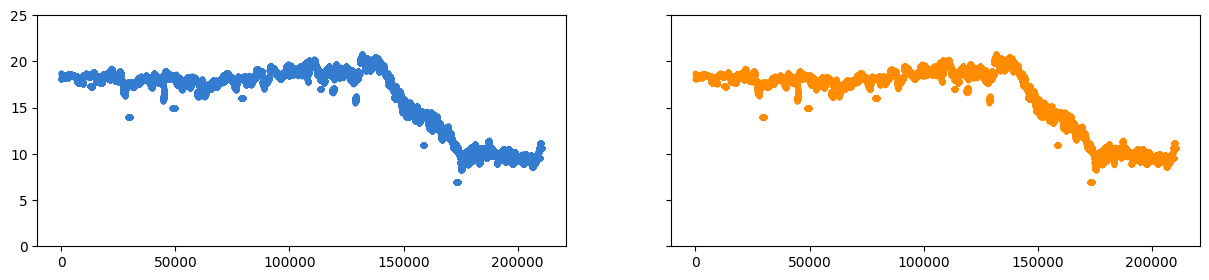

In [175]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,3))

# ax.yaxis.tick_right()

rntiModeGrouped.get_group(('DL', 1))['SINR(dB)'].plot(style='.', color="#337CCF", ax=ax)
rntiModeGrouped.get_group(('UL', 1))['SINR(dB)'].plot(style='.', color='darkorange', ax=ax2)

ax.set_yticks([0, 5, 10, 15, 20, 25])
ax1.set_yticks([0, 5, 10, 15, 20, 25])




/tmp/ipykernel_19620/546770793.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.')


<Axes: >

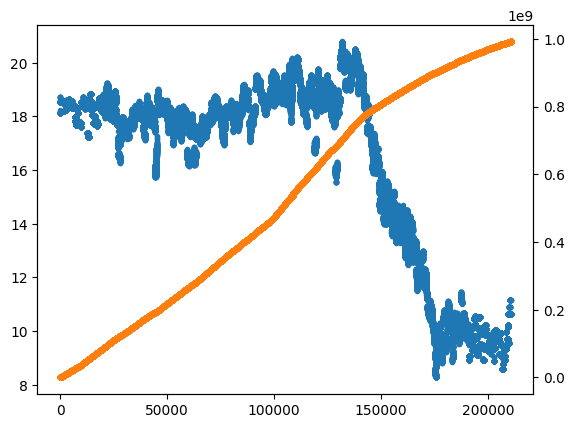

In [133]:
ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.')
cwndDF_scenario['new_CWND'].plot(secondary_y=True, style='.')

<Axes: >

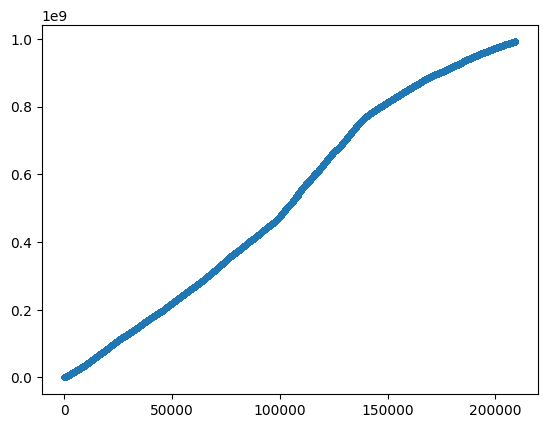

In [69]:
cwndDF_scenario['new_CWND'].plot(style='.')

In [ ]:
filename = 'RxPacketTrace_1.txt'
with open(filename, "r") as rxpacketfile:
    dataset = pd.read_csv(rxpacketfile, sep='\t', \
                       names=['mode', 'time', 'frame', 'subF', '1stSym', \
                           'symbol#', 'cellId', 'rnti', 'ccId', 'tbSize', 'mcs', 'rv', \
                           'SINR(dB)', 'corrupt', 'TBler'], \
                       dtype={'mode': str}, \
                       index_col=1,
                       low_memory=False,
                       #skiprows=0,
                       #header=0,
                       verbose=True,
                       
                      )
dataset['SINR(dB)'] = pd.to_numeric(dataset['SINR(dB)'], errors='coerce')
dataset[[
'SINR(dB)'
]].describe()

# dataset[[
# 'SINR(dB)'
# ]].info()

In [ ]:
data[['BTCEMI_MAX',
      'BTCEMI_MIN',
      'BTCEMI_GUE',
      'BTCOAL_MAX',
      'BTCOAL_MIN',
      'BTCOAL_GUE',
      'BTCOIL_MAX',
      'BTCOIL_MIN',
      'BTCOIL_GUE',
      'BTCGAS_MAX',
      'BTCGAS_MIN',
      'BTCGAS_GUE']
    ].describe()

In [ ]:

with open('RxPacketTrace_1.txt', "r") as rxpacketfile:
    dataset = pd.read_csv(rxpacketfile, sep='\t', low_memory=False)

dataset['time'] = pd.to_numeric(dataset['time'])

anomalous_data1 = dataset[(dataset['time'] >= 3) & (dataset['time'] <= 3.1)]
anomalous_data2 = dataset[(dataset['time'] >= 5) & (dataset['time'] <= 5.1)]
anomalous_data3 = dataset[(dataset['time'] >= 8) & (dataset['time'] <= 8.1)]
anomalous_data4 = dataset[(dataset['time'] >= 12) & (dataset['time'] <= 12.1)]
anomalous_data5 = dataset[(dataset['time'] >= 18) & (dataset['time'] <= 18.1)]
anomalous_data6 = dataset[(dataset['time'] >= 20) & (dataset['time'] <= 20.1)]


print(anomalous_data1)
print(anomalous_data2)
print(anomalous_data3)
print(anomalous_data4)
print(anomalous_data5)
print(anomalous_data6)

In [24]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the data
df = pd.read_csv('RxPacketTrace_1.txt', sep='\t', header=0)

sinr_data = df['SINR(dB)'].values.reshape(-1, 1)

# Fit the Isolation Forest model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
clf.fit(sinr_data)

# Predict anomalies
sinr_pred = clf.predict(sinr_data)

# Convert predictions to a more readable format (0: normal, 1: anomaly)
sinr_pred[sinr_pred == 1] = 0
sinr_pred[sinr_pred == -1] = 1

# Add the predictions to your dataframe
df['Anomaly'] = sinr_pred

df.to_csv('output_with_anomalies.csv', index=False)

print(df.head())


print((df['Anomaly'] == 1).sum())
print((df['Anomaly'] == 1).sum())

  DL/UL      time  frame  subF  slot  1stSym  symbol#  cellId  rnti  ccId  \
0    DL  0.004036      0     4     0       1        1       1     1     0   
1    UL  0.005036      0     5     0       1        1       1     1     0   
2    DL  0.005786      0     5     3       1        1       1     1     0   
3    DL  0.034036      3     4     0       1        1       1     1     0   
4    UL  0.035036      3     5     0       1        1       1     1     0   

   tbSize  mcs  rv  SINR(dB)  corrupt   TBler  Anomaly  
0      88    0   0   16.3925        0  0.0000        0  
1      88    0   0   16.3925        0  0.0000        0  
2    1487   22   0   16.3925        0  0.0004        0  
3      88    0   0   16.3925        0  0.0000        0  
4      88    0   0   16.3925        0  0.0000        0  
37145
37145


In [ ]:
# Define the path to your file
file_path = 'test.txt'

dataset = pd.read_csv(file_path, sep='\t')  # Adjust the separator if necessary

# Define the time ranges and set the 'anomalous' column to 1 for rows that fall within these ranges
time_ranges = [(3, 3.1), (5, 5.1), (8, 8.1), (12.0001, 12.1), (18.0001, 18.1), (20.0001, 20.1)]

for start, end in time_ranges:
    dataset.loc[(dataset['time'] >= start) & (dataset['time'] <= end), 'anomalous'] = 1
    dataset.loc[(dataset['time'] == 18.0), 'anomalous' ] = 0
    dataset.loc[(dataset['time'] == 20.0), 'anomalous' ] = 0

# Save the modified dataset back to a file, if needed
dataset.to_csv(file_path, sep='\t', index=False)

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('average_SINR_with_anomalies.txt', sep='\t', header=0)

# Check the first few rows to understand the data
print(df.head())

# Extract SINR values
sinr_data = df['SINR(dB)'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
sinr_data_scaled = scaler.fit_transform(sinr_data)

# Split the data into training and validation sets
X_train, X_val = train_test_split(sinr_data_scaled, test_size=0.2, random_state=42)

# Fit the Isolation Forest model
clf = IsolationForest(n_estimators=12, max_samples=100, contamination=0.01, random_state=42)
clf.fit(X_train)

# Predict anomalies
sinr_pred = clf.predict(sinr_data_scaled)

# Convert predictions to a more readable format (0: normal, 1: anomaly)
sinr_pred = np.where(sinr_pred == 1, 0, 1)

# Add the predictions to your dataframe
df['Anomaly'] = sinr_pred

# Save the dataframe with anomalies
df.to_csv('output_with_anomalies.csv', index=False)

# Display the first few rows with anomalies
print(df.head())

# Extract true labels and predicted labels
true_labels = df['anomalous'].values
predicted_labels = df['Anomaly'].values

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


  DL/UL      time  frame  subF  slot  1stSym  symbol#  cellId  rnti  ccId  \
0    DL  0.004036      0     4     0       1        1       1     1     0   
1    UL  0.005036      0     5     0       1        1       1     1     0   
2    DL  0.005786      0     5     3       1        1       1     1     0   
3    DL  0.034036      3     4     0       1        1       1     1     0   
4    UL  0.035036      3     5     0       1        1       1     1     0   

   tbSize  mcs  rv  SINR(dB)  corrupt   TBler  anomalous  
0      88    0   0  18.70896        0  0.0000          0  
1      88    0   0  18.70896        0  0.0000          0  
2    1487   22   0  18.70896        0  0.0004          0  
3      88    0   0  18.70896        0  0.0000          0  
4      88    0   0  18.70896        0  0.0000          0  
  DL/UL      time  frame  subF  slot  1stSym  symbol#  cellId  rnti  ccId  \
0    DL  0.004036      0     4     0       1        1       1     1     0   
1    UL  0.005036      0     

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_csv('average_SINR_with_anomalies.txt', sep='\t', header=0)

# Extract the feature(s) for clustering
X = df[['SINR(dB)']]

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Assuming the optimal number of clusters from the elbow method is K
# Replace 'K' with the number of clusters you decide based on the plot
K = 2 # Example
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=5, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to your dataframe
df['Cluster'] = y_kmeans

# Optionally, save the dataframe with cluster labels
df.to_csv('output_with_clusters.csv', index=False)

print(df.head())
# Assuming 'anomalous' is your external label column
true_labels = df['anomalous']  # This should be a binary column indicating anomaly (1) or not (0)
predicted_labels = df['Cluster'].map({0: 1, 1: 0, 2: 0})  # Example mapping, adjust based on your clusters

# Calculate confusion matrix and classification report
cm = confusion_matrix(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels)

print(cm)
print(report)


# Assuming 'X' is your feature matrix and 'y_kmeans' contains your cluster labels
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")


Accuracy: 0.9972709421905681
Precision: 0.904639175257732
Recall: 0.9887323943661972
F1 Score: 0.9448183041722745
0         18.708960
1         18.708960
2         18.708960
3         18.708960
4         18.708960
            ...    
150228    10.625945
150229    10.625945
150230    10.625945
150231    10.625945
150232    10.625945
Name: SINR(dB), Length: 146615, dtype: float64
71929    18.0
71930    18.0
71931    18.0
71932    18.0
71933    18.0
71934    18.0
71935    18.0
71936    18.0
71937    18.0
71938    18.0
71939    18.0
71940    18.0
71941    18.0
71942    18.0
71943    18.0
71944    18.0
71945    18.0
71946    18.0
71947    18.0
71948    18.0
71949    18.0
71950    18.0
71951    18.0
71952    18.0
71953    18.0
71954    18.0
71955    18.0
71956    18.0
71957    18.0
71958    18.0
Name: SINR(dB), dtype: float64


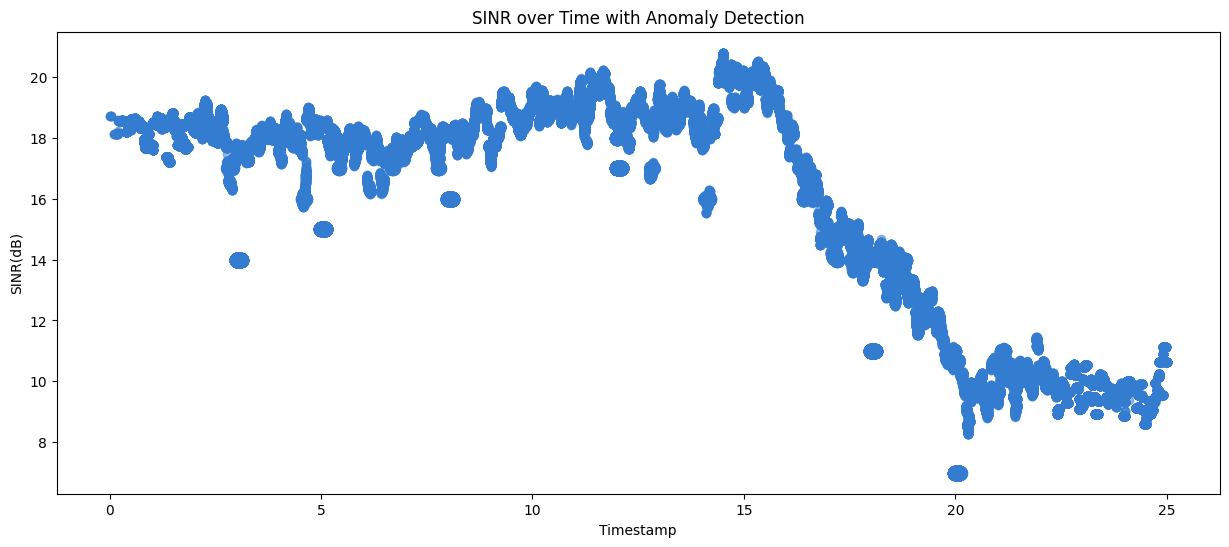

[[29263    74]
 [    8   702]]


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Using double brackets to keep the DataFrame structure
y = df['anomalous']

# Scale the SINR(dB) feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=100)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

df['Predicted Label'] = knn.predict(scaler.transform(df[['SINR(dB)']]))  # Predict for the whole dataset
df['True Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 1)  # True positives
df['False Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 0)  # False positives
df['False Negatives'] = (df['Predicted Label'] == 0) & (df['anomalous'] == 1)  # False positives
print(df[df['anomalous'] == 0]['SINR(dB)'])
# Plot
plt.figure(figsize=(15, 6))

print(df[df['False Negatives']]['SINR(dB)'])

# plt.plot(df['time'], df['SINR(dB)'], linestyle='-', color='#337CCF')  # Line to connect points

# Plot normal points
plt.scatter(df[df['anomalous'] == 0]['time'], df[df['anomalous'] == 0]['SINR(dB)'], c='#337CCF', label='Normal', alpha=0.5)

# Plot true positives
plt.scatter(df[df['True Positives']]['time'], df[df['True Positives']]['SINR(dB)'], c='#337CCF', label='True Positives (Detected Anomalies)', s=100)

# Plot false positives
plt.scatter(df[df['False Positives']]['time'], df[df['False Positives']]['SINR(dB)'], c='#337CCF', label='False Positives' , s=100)

plt.scatter(df[df['False Negatives']]['time'], df[df['False Negatives']]['SINR(dB)'], c='#337CCF', label='False Negatives', s=100)

# Label the axes and add a title and a legend
plt.xlabel('Timestamp')
plt.ylabel('SINR(dB)')
plt.title('SINR over Time with Anomaly Detection')
# plt.legend()
plt.grid(False)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Isolate the SINR(dB) column as the feature
y = df['anomalous']  # Target variable indicating anomaly status

# Scale the SINR(dB) feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=36)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42,max_depth=8,  # Limit depth of trees to prevent overfitting
                            min_samples_leaf=4,  # Moe samples per leaf
                            min_samples_split=8)  # More samples required to split)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9931440742836223
Precision: 1.0
Recall: 0.7048710601719198
F1 Score: 0.826890756302521


In [129]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Isolate the SINR(dB) column as the feature
y = df['anomalous']  # Target variable indicating anomaly status

# Scale features (optional for RandomForest, but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=19)

# Initialize the Random Forest classifier with adjusted parameters
rf = RandomForestClassifier(n_estimators=50,  # Increased number of trees for more stable predictions
                            max_depth=9,  # Limit depth of trees to prevent overfitting
                            min_samples_leaf=2,  # Moe samples per leaf
                            min_samples_split=8,  # More samples required to split
                            random_state=20,
                            oob_score=True)  # Enable OOB score to evaluate generalization

# Train the Random Forest model
rf.fit(X_train, y_train)

# Use OOB score as an estimate of accuracy on unseen data
oob_accuracy = rf.oob_score_

# Predict on the testing set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")


Random Forest - Accuracy: 0.9955736013578727, Precision: 1.0, Recall: 0.8178082191780822, F1 Score: 0.8997739261492087


In [195]:
import pandas as pd
from sklearn.svm import OneClassSVM 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Read the data
file_path = 'test2.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Isolate the SINR(dB) column as the feature
y = df['anomalous']  # Target variable indicating anomaly status

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'nu': [0.001, 0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}


# Create and train the SVM model
svm_model = OneClassSVM(kernel='rbf', nu=0.001, scoring='f1', cv=5)  # Adjust the nu parameter as needed
svm_model.fit(X_scaled)
# Predict outliers/anomalies
y_pred = svm_model.predict(X_scaled)

# Count the number of outliers/anomalies
n_outliers = (y_pred == -1).sum()
print("Number of anomalies detected:", n_outliers)

# Convert the true labels to binary where 1 represents anomalies
y_true_binary = y.replace({-1: 1, 1: -1})

# Compute precision, recall, and F1 score
precision = precision_score(y_true_binary, y_pred, pos_label=1)
recall = recall_score(y_true_binary, y_pred, pos_label=1)
f1 = f1_score(y_true_binary, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Number of anomalies detected: 74875
Precision: 6.677439602558796e-05
Recall: 0.0013815971262779773
F1 Score: 0.00012739178068231038


In [197]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
file_path = 'average_SINR_with_anomalies.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature variable
X = df[['SINR(dB)']] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the LOF model
lof_model = LocalOutlierFactor(n_neighbors=50, novelty=False, contamination='auto')
 
# Fit the model and predict outliers
y_pred = lof_model.fit_predict(X_scaled)
y_true = df['anomalous'].values
precision = precision_score(y_true, y_pred, pos_label=-1)
recall = recall_score(y_true, y_pred, pos_label=-1)
f1 = f1_score(y_true, y_pred, pos_label=-1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

file_path = 'average_SINR_with_anomalies.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature
X = df[['SINR(dB)']]  # Isolate the SINR(dB) column as the feature

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=2)  # Adjust parameters as needed
y_pred = dbscan_model.fit_predict(X_scaled)

y_true_binary = np.where(y_pred == -1, 1, 0)

# Compute precision, recall, and F1 score
precision = precision_score(y, y_true_binary)
recall = recall_score(y, y_true_binary)
f1 = f1_score(y, y_true_binary)

Epoch 1/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - loss: 0.5779 - val_loss: 0.2179
Epoch 2/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 60s 20ms/step - loss: 0.1944 - val_loss: 0.1506
Epoch 3/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - loss: 0.1428 - val_loss: 0.1333
Epoch 4/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - loss: 0.1282 - val_loss: 0.1291
Epoch 5/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 0.1271 - val_loss: 0.1284
Epoch 6/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 57s 19ms/step - loss: 0.1259 - val_loss: 0.1282
Epoch 7/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - loss: 0.1257 - val_loss: 0.1281
Epoch 8/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 0.1237 - val_loss: 0.1280
Epoch 9/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - loss: 0.1242 - val_loss: 0.1280
Epoch 10/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - loss: 0.1263 - val_loss: 0.1280
Epoch 11/30
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - loss: 0.1278 - val_loss: 0.1280
Epoch 12

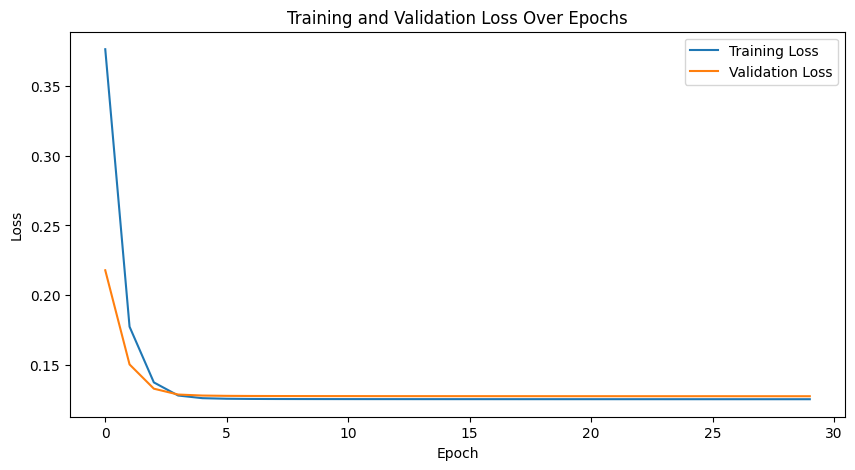

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step
939/939 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


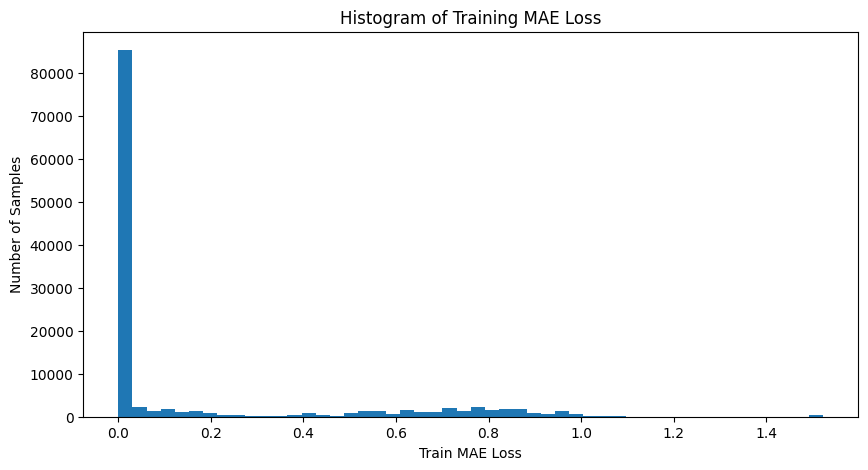

939/939 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97     29324
     Anomaly       0.08      0.17      0.11       721

    accuracy                           0.94     30045
   macro avg       0.53      0.56      0.54     30045
weighted avg       0.96      0.94      0.95     30045



In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam


# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Assume 'time' is the sequential column and 'SINR(dB)' is the feature
time_steps = 10  # Number of time steps you want to use in the model

# Scaling the feature
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['SINR(dB)']].values)

# Create sequences and corresponding labels
def create_sequences_with_labels(data, labels, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        # Check if any label in the sequence is anomalous (1)
        if 1 in labels[i:(i + time_steps)]:
            y.append(1)  # Anomalous
        else:
            y.append(0)  # Normal
    return np.array(X), np.array(y)

# Assuming df is your original DataFrame and 'anomalous' is the label column
df_scaled = scaler.transform(df[['SINR(dB)']].values)  # Make sure df is scaled as before
labels = df['anomalous'].values

# Generate sequences and corresponding labels
X, y = create_sequences_with_labels(df_scaled, labels, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inputs = Input(shape=(time_steps, 1))
encoded = LSTM(128, return_sequences=True)(inputs)
encoded = LSTM(64, return_sequences=False)(encoded)
decoded = RepeatVector(time_steps)(encoded)
decoded = LSTM(64, return_sequences=True)(decoded)
decoded = LSTM(128, return_sequences=True)(decoded)
outputs = LSTM(1, return_sequences=True)(decoded)

autoencoder = Model(inputs, outputs)

optimizer = Adam(learning_rate=0.00001)

autoencoder.compile(optimizer=optimizer, loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
history = autoencoder.fit(
    X_train, X_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the training set to calculate the reconstruction loss
predictions = autoencoder.predict(X_train)

# Compute reconstruction loss
train_loss = np.mean(np.abs(predictions - X_train), axis=1)
threshold = np.percentile(train_loss, 95)  # Set threshold as 95th percentile of loss

# Detect all where the reconstruction error is above the threshold on the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
anomalies = test_loss > threshold

# Plot histogram of training MAE loss
plt.figure(figsize=(10, 5))
plt.hist(train_loss, bins=50)
plt.xlabel("Train MAE Loss")
plt.ylabel("Number of Samples")
plt.title("Histogram of Training MAE Loss")
plt.show()


# Predict anomalies
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
threshold = np.percentile(test_loss, 95)  # Adjust this percentile based on your needs
predicted_labels = test_loss > threshold

# Calculate classification metrics
print(classification_report(y_test, predicted_labels, target_names=['Normal', 'Anomaly']))

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 10, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 5, 32)          │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_6 (RepeatVector)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 10, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,257 (235.38 KB)

 Trainable params: 60,257 (235.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9590 - loss: 0.3963 - val_accuracy: 0.9758 - val_loss: 0.1062
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9754 - loss: 0.1016 - val_accuracy: 0.9758 - val_loss: 0.0937
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9753 - loss: 0.0929 - val_accuracy: 0.9758 - val_loss: 0.0912
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9759 - loss: 0.0896 - val_accuracy: 0.9758 - val_loss: 0.0894
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9765 - loss: 0.0838 - val_accuracy: 0.9758 - val_loss: 0.0825
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9774 - loss: 0.0803 - val_accuracy: 0.9792 - val_loss: 0.0793
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9783 - loss: 0.0790 - val_accuracy: 0.9792 - val_loss: 0.0768
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9786 - loss: 0.0771 - val_accu

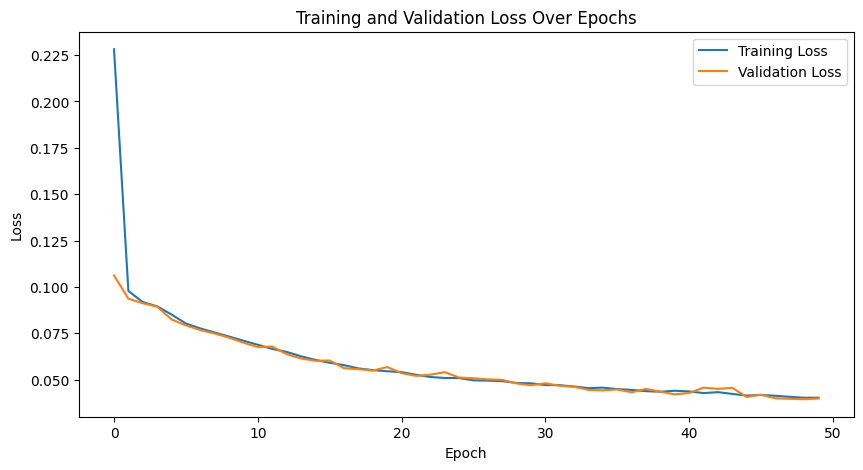

939/939 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9830 - loss: 0.0470
Test Loss: 0.041895393282175064, Test Accuracy: 0.9844067692756653
939/939 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99    292920
     Anomaly       0.85      0.46      0.59      7530

    accuracy                           0.98    300450
   macro avg       0.92      0.73      0.79    300450
weighted avg       0.98      0.98      0.98    300450



In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Scaling the feature
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['SINR(dB)']].values)

# Define time steps for sequence creation
time_steps = 10

# Function to create sequences
def create_sequences(data, time_steps):
    X = []
    for i in range(len(data) - time_steps + 1):
        X.append(data[i:(i + time_steps)])
    return np.array(X)

# Create sequences
X = create_sequences(df_scaled, time_steps)

# Since we use a supervised setting, let's also create corresponding labels
y = np.array([1 if 1 in df['anomalous'].values[i:i + time_steps] else 0 for i in range(len(df_scaled) - time_steps + 1)])

# Reshape y to have three dimensions [samples, time_steps, features]
y = np.expand_dims(y, axis=-1)  # Adds a new axis, converting y to shape [samples, 1]
y = np.repeat(y, time_steps, axis=1)  # Repeats the label across the time_steps dimension

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define model architecture
inputs = Input(shape=(time_steps, 1))
conv = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
pool = MaxPooling1D(pool_size=2)(conv)
flat = TimeDistributed(Dense(32))(pool)
encoded = LSTM(64)(flat)
decoded = RepeatVector(time_steps)(encoded)
decoder_lstm = LSTM(64, return_sequences=True)(decoded)
outputs = TimeDistributed(Dense(1, activation='sigmoid'))(decoder_lstm)  # Sigmoid for binary classification

# Create and compile the model
model = Model(inputs, outputs)
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set with the reshaped labels
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
# Predict the test set
test_predictions = model.predict(X_test)

# Since the model outputs probabilities, you need to convert these to binary labels
# Let's use 0.5 as a threshold for binary classification
test_pred_labels = (test_predictions > 0.5).astype(int)

# Because y_test and predictions are 3D arrays of shape [samples, time_steps, 1], we need to flatten these to 1D
y_test_flat = y_test.flatten()
test_pred_labels_flat = test_pred_labels.flatten()

# Compute the classification report
report = classification_report(y_test_flat, test_pred_labels_flat, target_names=['Normal', 'Anomaly'])
print(report)

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy import stats

file_path = 'average_SINR_with_anomalies.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

# Implementing anomaly detection using Z-score and Isolation Forest as described earlier
df['z_score'] = np.abs(stats.zscore(df['SINR(dB)']))
threshold = 3
df['outlier_z'] = df['z_score'] > threshold

isolation_forest = IsolationForest(n_estimators=50, contamination=0.01) # 1% of data as outliers
df['outlier_if'] = isolation_forest.fit_predict(df[['SINR(dB)']]) == -1

# Calculate metrics
# True labels from the 'anomalous' column in your dataset
true_labels = df['anomalous']

# Precision, Recall, F1 for Z-score
precision_z = precision_score(true_labels, df['outlier_z'])
recall_z = recall_score(true_labels, df['outlier_z'])
f1_z = f1_score(true_labels, df['outlier_z'])

# Precision, Recall, F1 for Isolation Forest
precision_if = precision_score(true_labels, df['outlier_if'])
recall_if = recall_score(true_labels, df['outlier_if'])
f1_if = f1_score(true_labels, df['outlier_if'])


print("\nIsolation Forest Method:")
print("Precision:", precision_if)
print("Recall:", recall_if)
print("F1 Score:", f1_if)


Isolation Forest Method:
Precision: 0.4020066889632107
Recall: 0.16611387506909894
F1 Score: 0.23508703305300216


/home/glen/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9989315882608261
Precision: 0.9687092568448501
Recall: 0.9893475366178429
F1 Score: 0.9789196310935442
0         16.3925
1         16.3925
2         16.3925
3         16.3925
4         16.3925
           ...   
149749    22.5340
149750    22.5340
149751    22.5340
149752    22.5340
149753    22.5340
Name: SINR(dB), Length: 146140, dtype: float64


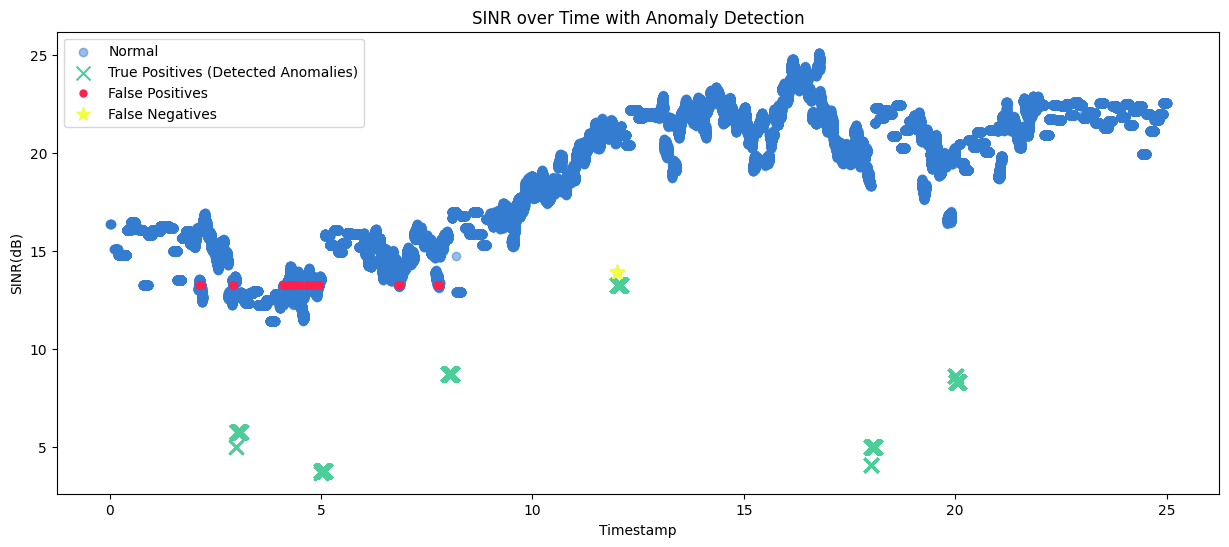

[[29176    24]
 [    8   743]]


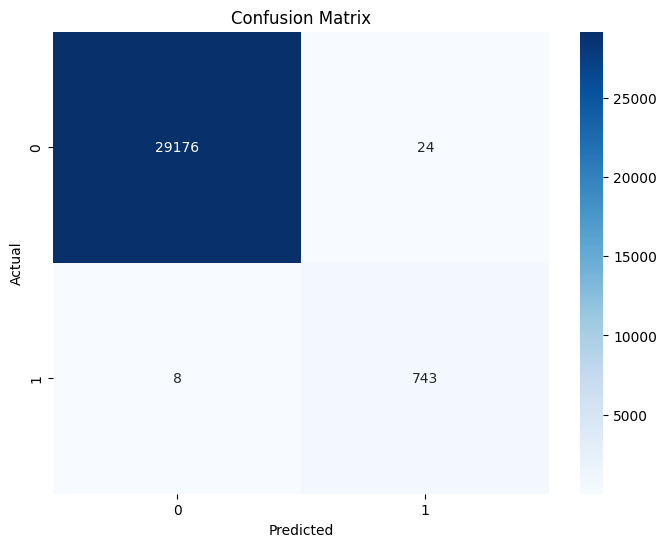

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the data
file_path = 'test.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Using double brackets to keep the DataFrame structure
y = df['anomalous']

# Scale the SINR(dB) feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=400)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

df['Predicted Label'] = knn.predict(scaler.transform(df[['SINR(dB)']]))  # Predict for the whole dataset
df['True Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 1)  # True positives
df['False Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 0)  # False positives
df['False Negatives'] = (df['Predicted Label'] == 0) & (df['anomalous'] == 1)  # False positives
print(df[df['anomalous'] == 0]['SINR(dB)'])
# Plot
plt.figure(figsize=(15, 6))

# plt.plot(df['time'], df['SINR(dB)'], linestyle='-', color='#337CCF')  # Line to connect points

# Plot normal points
plt.scatter(df[df['anomalous'] == 0]['time'], df[df['anomalous'] == 0]['SINR(dB)'], c='#337CCF', label='Normal', alpha=0.5)

# Plot true positives
plt.scatter(df[df['True Positives']]['time'], df[df['True Positives']]['SINR(dB)'], c='#4CCD99', label='True Positives (Detected Anomalies)', marker='x', s=100)

# Plot false positives
plt.scatter(df[df['False Positives']]['time'], df[df['False Positives']]['SINR(dB)'], c='#FF204E', label='False Positives', marker='.', s=100)

plt.scatter(df[df['False Negatives']]['time'], df[df['False Negatives']]['SINR(dB)'], c='#F0FF42', label='False Negatives', marker='*', s=100)

# Label the axes and add a title and a legend
plt.xlabel('Timestamp')
plt.ylabel('SINR(dB)')
plt.title('SINR over Time with Anomaly Detection')
plt.legend()
plt.grid(False)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the data
file_path = 'average_SINR_with_anomalies.txt'  # Update this to your file's path
df = pd.read_csv(file_path, sep='\t', header=0)

# Prepare the feature and target variable
X = df[['SINR(dB)']]  # Using double brackets to keep the DataFrame structure
y = df['anomalous']

# Scale the SINR(dB) feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model
df['cluster'] = dbscan.fit_predict(X_scaled)

# DBSCAN labels noise points as -1, so we'll treat them as anomalies
df['Predicted Label'] = df['cluster'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate the model
y_pred = df['Predicted Label']
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Identify True Positives, False Positives, and False Negatives
df['True Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 1)
df['False Positives'] = (df['Predicted Label'] == 1) & (df['anomalous'] == 0)
df['False Negatives'] = (df['Predicted Label'] == 0) & (df['anomalous'] == 1)

# Plotting
plt.figure(figsize=(15, 6))

# Plot normal points
plt.scatter(df[df['anomalous'] == 0]['time'], df[df['anomalous'] == 0]['SINR(dB)'], c='#337CCF', label='Normal', alpha=0.5)

# Plot true positives
plt.scatter(df[df['True Positives']]['time'], df[df['True Positives']]['SINR(dB)'], c='#4CCD99', label='True Positives (Detected Anomalies)', marker='x', s=100)

# Plot false positives
plt.scatter(df[df['False Positives']]['time'], df[df['False Positives']]['SINR(dB)'], c='#FF204E', label='False Positives', marker='.', s=100)

# Plot false negatives
plt.scatter(df[df['False Negatives']]['time'], df[df['False Negatives']]['SINR(dB)'], c='#F0FF42', label='False Negatives', marker='*', s=100)

# Label the axes and add a title and a legend
plt.xlabel('Timestamp')
plt.ylabel('SINR(dB)')
plt.title('SINR over Time with Anomaly Detection using DBSCAN')
plt.legend()
plt.grid(False)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
